In [1]:
#importing libraries to use along the process

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#reading our data 

In [4]:
TD = pd.read_csv(r"C:\Users\Mohsen\titanic_data.csv")

In [6]:
# I'll Start by wrangling and cleaning our data
# I could see some empty cells in the age column so i decided to fill them with the average age for the remaining passengers
# also for the empty celss in the cabin column i will replace them with N/A

In [21]:
#replacing empty cells in the age column with the age mean


TD['Age'].fillna(TD['Age'].mean(), inplace=True)

In [22]:
#replacing empty cells in the cabin column with N/A

TD['Cabin'].fillna('N/A', inplace=True)

In [49]:
#rounding age to the nearest integers

TD['Age'] = TD['Age'].round(1)

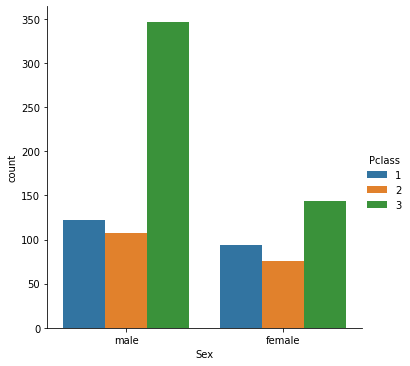

In [17]:
# Now let's seperate the genders by classes, we can use the 'hue' arguement here!

sns.catplot('Sex', data=TD, kind="count", hue='Pclass')

In [20]:
survivedpassengers = TD.groupby('Survived')

In [21]:
# at first I need to find the percentage of passengers that have not survived
# I have found that 38.8 % of the passengers have survived

(survivedpassengers.get_group(1).count('index') / TD.count()) * 100

PassengerId    38.383838
Survived       38.383838
Pclass         38.383838
Name           38.383838
Sex            38.383838
Age            40.616246
SibSp          38.383838
Parch          38.383838
Ticket         38.383838
Fare           38.383838
Cabin          66.666667
Embarked       38.245219
dtype: float64

<AxesSubplot:>

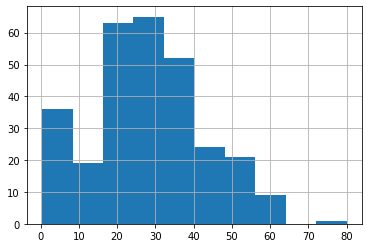

In [22]:
# By looking at this graph we can find that the majority of survived passengers are young people which was expected because 
# they are the majority anyway
survivedpassengers.get_group(1)['Age'].hist()

In [23]:
# Percentage of passengers with siblings as follows 
TD['SibSp'].value_counts(normalize=True) * 100

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

In [24]:
survived = survivedpassengers.get_group(1)
# I will start bby grouping buy survived people by the number of siblings or spouses

siblings_and_spouses = survived.groupby('SibSp')
survived['SibSp'].value_counts(normalize=True) * 100

#we found out that around 61% of the survived passengers didn't have any siblings on board 

0    61.403509
1    32.748538
2     3.801170
3     1.169591
4     0.877193
Name: SibSp, dtype: float64

In [25]:
# you can see here percentage of passengers according to their social level
TD['Pclass'].value_counts(normalize=True) * 100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

In [26]:
# now let's the same percentage among survived passengers
# the below data shows clearly that first class citizens had the first priority to be saved 
# and that third class citizens 
survivedpassengers['Pclass'].value_counts(normalize=True) * 100

Survived  Pclass
0         3         67.759563
          2         17.668488
          1         14.571949
1         1         39.766082
          3         34.795322
          2         25.438596
Name: Pclass, dtype: float64

In [27]:
#male and female percentages
TD['Sex'].value_counts(normalize=True) * 100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In [30]:
# these percentages shows clearly that females were prioritised ove males 
survivedpassengers['Sex'].value_counts(normalize=True) * 100

Survived  Sex   
0         male      85.245902
          female    14.754098
1         female    68.128655
          male      31.871345
Name: Sex, dtype: float64

C:\Users\Mohsen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


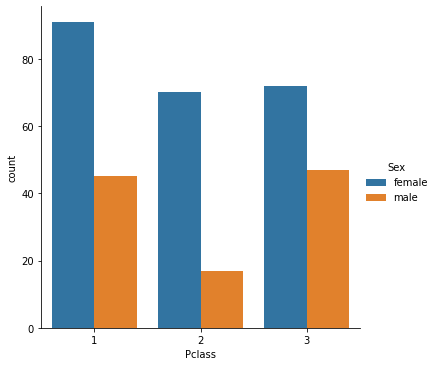

In [35]:
#this graph shows exactly genders separated by their socio-economic level in the survived group 
# which shows clearly females being prioritised during saving process 


sns.catplot('Pclass', data=survived, kind="count", hue ='Sex')

C:\Users\Mohsen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


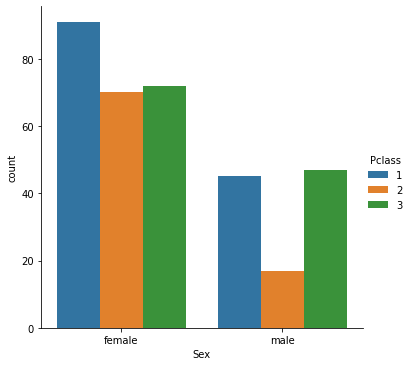

In [38]:
#this graph shows exactly genders separated by their socio-economic level in the survived group 
# it shows a noticed female prioritisation over males 
# Pclass: Pclass-1 had best while Pclass-3 has the worst survival rate.

sns.catplot('Sex', data=survived, kind="count", hue ='Pclass')

In [39]:
#Conclsion:
#Our complete analysis mainly covered three factors in this anlysis (Age, Sex, Pclass).
#Age: Doesn't play much role in determining the survival chances, except for ages below 1 years.
#Sex: Women had better chances of survival than men.
#Pclass: Pclass-1 had best while Pclass-3 has the worst survival rate.
#So we can say, that being a women in Pclass-1 seems to have the best chances of survival.
#However being a woman could not be considered as 100% survival chance.

